In [1]:
!gdown 18oAk7YvwmgKDRdfavU1DKwLlcWhbktbk

Downloading...
From: https://drive.google.com/uc?id=18oAk7YvwmgKDRdfavU1DKwLlcWhbktbk
To: /content/Travel.csv
100% 468k/468k [00:00<00:00, 184MB/s]


# Rakamin Final Project - Kelompok 8 (Infinity)

### Anggota Kelompok:
- Andre Adeputra S
- Gilang Muhammad Risky
- Jomas Sekar Pawestri
- M Nurkholis Fauzi
- Muhammad Syarif U
- Naomi Florenata Damanik
- Sakinah Nurul R
- Vanesa

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.set_option('display.precision', 2)

In [3]:
rcParams['figure.figsize'] = 12, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Dataset diambil dari Kaggle, [Holiday Package Prediction](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction)

In [4]:
# Colab path
filepath = '/content/Travel.csv'

In [5]:
# Load Data
df = pd.read_csv(filepath)
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

# 1. Exploratory Data Analysis

## 1.1 Descriptive Analysis

In [6]:
df.shape

(4888, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Data terdiri dari 4888 baris dan 20 kolom yang terbagi menjadi 14 kolom numerik dan 6 kolom kategori bedasarkan jenis data. Berdasarkan pengamatan lebih lanjut kolom ProdTaken, CityTier, PreferredPropertyStar, Passport, dan OwnCar merupakan kolom kategori.

In [8]:
# Separate columns based on data type
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips', 
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [9]:
df[cats] = df[cats].astype('object')

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

Missing values ada di 8 kolom: Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome

In [11]:
# Check for duplicated rows ignoring CustomerID column
dupes = df.drop('CustomerID', axis=1).duplicated()
print(f'Total Duplicate Rows: {dupes.sum()}')

Total Duplicate Rows: 141


Terdapat 141 baris data yang apabila kolom CustomerID diabaikan menunjukkan nilai kolom yang identik

In [12]:
# Descriptive statistics for numerical columns
df[nums].describe().T

count       mean      std       min        25%  \
CustomerID                4888.0  202443.50  1411.19  200000.0  201221.75   
Age                       4662.0      37.62     9.32      18.0      31.00   
DurationOfPitch           4637.0      15.49     8.52       5.0       9.00   
NumberOfPersonVisiting    4888.0       2.91     0.72       1.0       2.00   
NumberOfFollowups         4843.0       3.71     1.00       1.0       3.00   
NumberOfTrips             4748.0       3.24     1.85       1.0       2.00   
NumberOfChildrenVisiting  4822.0       1.19     0.86       0.0       1.00   
MonthlyIncome             4655.0   23619.85  5380.70    1000.0   20346.00   

                               50%        75%       max  
CustomerID                202443.5  203665.25  204887.0  
Age                           36.0      44.00      61.0  
DurationOfPitch               13.0      20.00     127.0  
NumberOfPersonVisiting         3.0       3.00       5.0  
NumberOfFollowups              4.0       4.00       6.0  
NumberOfTrips                  3.0       4.00      22.0  
NumberOfChildrenVisiting       1.0       2.00       3.0  
MonthlyIncome              22347.0   25571.00   98678.0

Rentang nilai max dan min DurationOfPitch dan NumberOfTrips cukup jauh

MonthlyIncome memiliki nilai std yang cukup tinggi, menunjukkan ada kecenderungan pendapatan memengaruhi pemilihan produk

In [13]:
# Descriptive statistics for categorical columns
df[cats].describe().T

count unique           top    freq
ProdTaken                 4888      2             0    3968
CityTier                  4888      3             1    3190
PreferredPropertyStar   4862.0    3.0           3.0  2993.0
Passport                  4888      2             0    3466
OwnCar                    4888      2             1    3032
PitchSatisfactionScore    4888      5             3    1478
TypeofContact             4863      2  Self Enquiry    3444
Occupation                4888      4      Salaried    2368
Gender                    4888      3          Male    2916
ProductPitched            4888      5         Basic    1842
MaritalStatus             4888      4       Married    2340
Designation               4888      5     Executive    1842

In [14]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

ProdTaken: [1 0]

CityTier: [3 1 2]

PreferredPropertyStar: [3.0 4.0 5.0 nan]

Passport: [1 0]

OwnCar: [1 0]

PitchSatisfactionScore: [2 3 5 4 1]

TypeofContact: ['Self Enquiry' 'Company Invited' nan]

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male' 'Fe Male']

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



Kolom CityTier menunjukkan klasifikasi kota produk yang sesuai.

PreferredPropertyStar menunjukkan kecenderungan kategori star 3-5 dan mungkin dapat digunakan sebagai kriteria penentuan produk package yang baru.

Nilai pada kolom PitchSatisfactionScore beragam dan dapat diambil sebagai masukan untuk perbaikan produk.


Pada kategori gender terdapat 3 nilai unik yang pada umumnya hanya ada 2. Berdasar pengamatan di atas, nilai 'Fe Male' diduga merupakan kesalahan memasukkan data sehingga akan langsung dilakukan pengubahan

In [15]:
# The contents of the Gender column contain an error in writing “Fe Male” which should be “Female”.
df.replace('Fe Male','Female', inplace = True)

CityTier dapat menunjukkan klasifikasi kota target produk yang sesuai

PreferredPropertyStar menunjukkan kecenderungan kategori star 3-5 dan mungkin dapat digunakan sebagai kriteria penentuan produk package yang baru

ProdTaken memiliki mean yang cukup rendah menandakan kebanyakan produk yang tidak dipilih dapat menjadi evaluasi produk baru

PitchSatisfactionScore beragam dan dapat menjadi masukan untuk perbaikan produk


Berdasarkan insight-insight yang diperoleh di atas, beberapa tindak lanjut yang perlu dilakukan antara lain:
* Klasifikasi data mana yang numerical dan categorical (fitur prodtaken, citytier, etc merupakan categorical masih dalam numerical)
* Handling missing value
* Cek klasifikasi di fitur gender
* Persentase klasifikasi 


## 1.2 Univariate Analysis

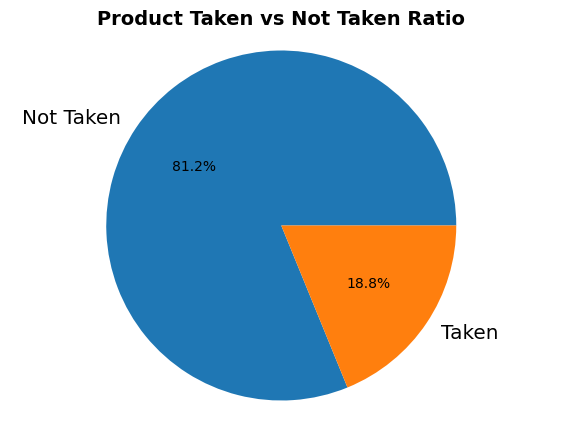

In [16]:
# Check for customers' purchase ratio
plt.figure(figsize=(7,5))
plt.pie(df['ProdTaken'].value_counts(), labels=['Not Taken', 'Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Product Taken vs Not Taken Ratio', fontsize=14, fontweight='bold')
plt.show()

Berdasarkan grafik di atas, dapat diamati bahwa 18.8% dari total pelanggan memutuskan untuk tidak membeli produk perusahaan. Nilai tersebut merupakan nilai dari kolom target ProdTaken yang akan digunakan sebagai target kolom yang mewakili metrik conversion rate. Dapat diamati dari diagram di atas, bahwa nilai antara customer yang membeli dan yang tidak cukup timpang. Pada tahap selanjutnya, kemungkinan akan diperlukan penanganan terhadap data yang timpang.

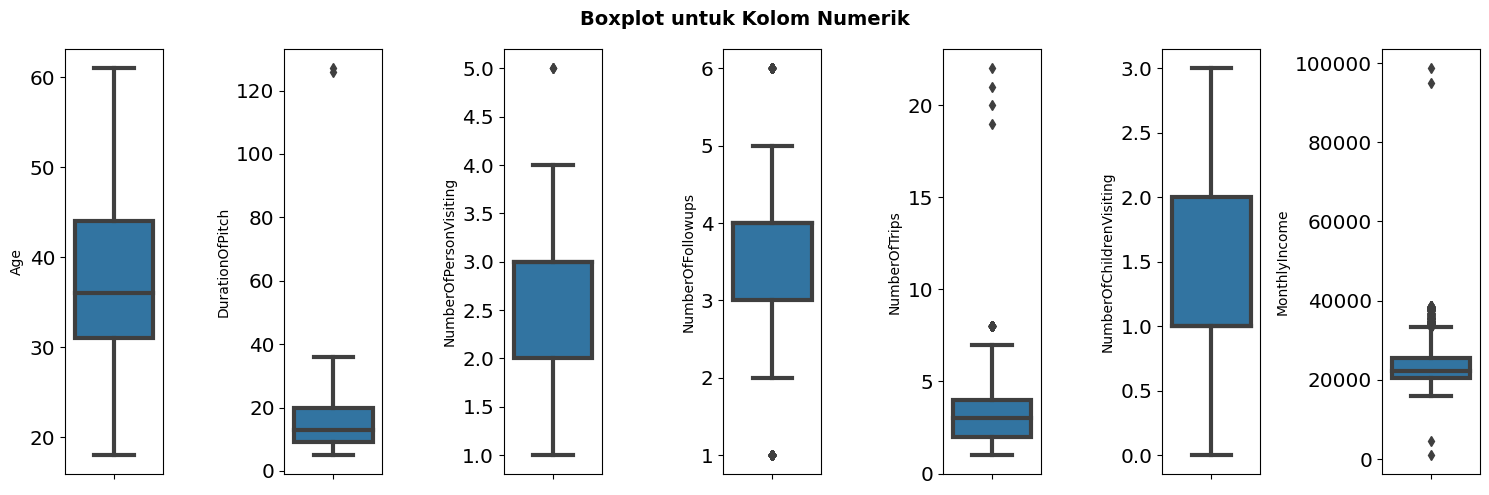

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Boxplot untuk Kolom Numerik', fontsize=14, fontweight='bold')
for i in range(1, len(nums)):
    plt.subplot(1, 7, i)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.show()

DurationOfPitch secara umum (IQR) tersebar dari 9-20 menit, namun terdapat outlier maximal dengan durasi selama 127 menit

kisaran NumerOfTrips yang diambil adalah 2-4 trips, namun terdapat banyak outlier dengan maksimal jumlah trips sebanyak 22

MonthlyIncome secara umum berkisar 20-25 ribu rupe(?), memiliki data outlier dengan income terendah 1000 rupee dan tertinggi sekitar 98678 rupe


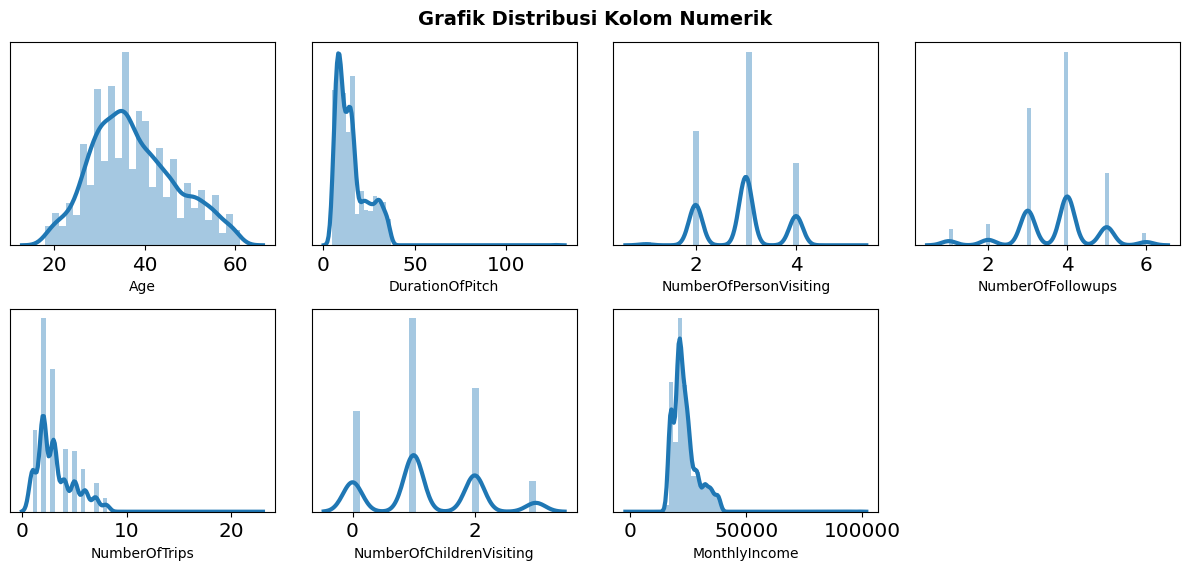

In [ ]:
plt.suptitle('Grafik Distribusi Kolom Numerik', fontsize=14, fontweight='bold')
for i in range(1, len(nums)):
    plt.subplot(3, 4, i)
    sns.distplot(df[nums[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

Fitur Age memiliki sebaran data yang cukup normal

kolom DurationOfPitch, NumberOfTrips dan MonthlyIncome memiliki sebaran data positif skew (right tail)


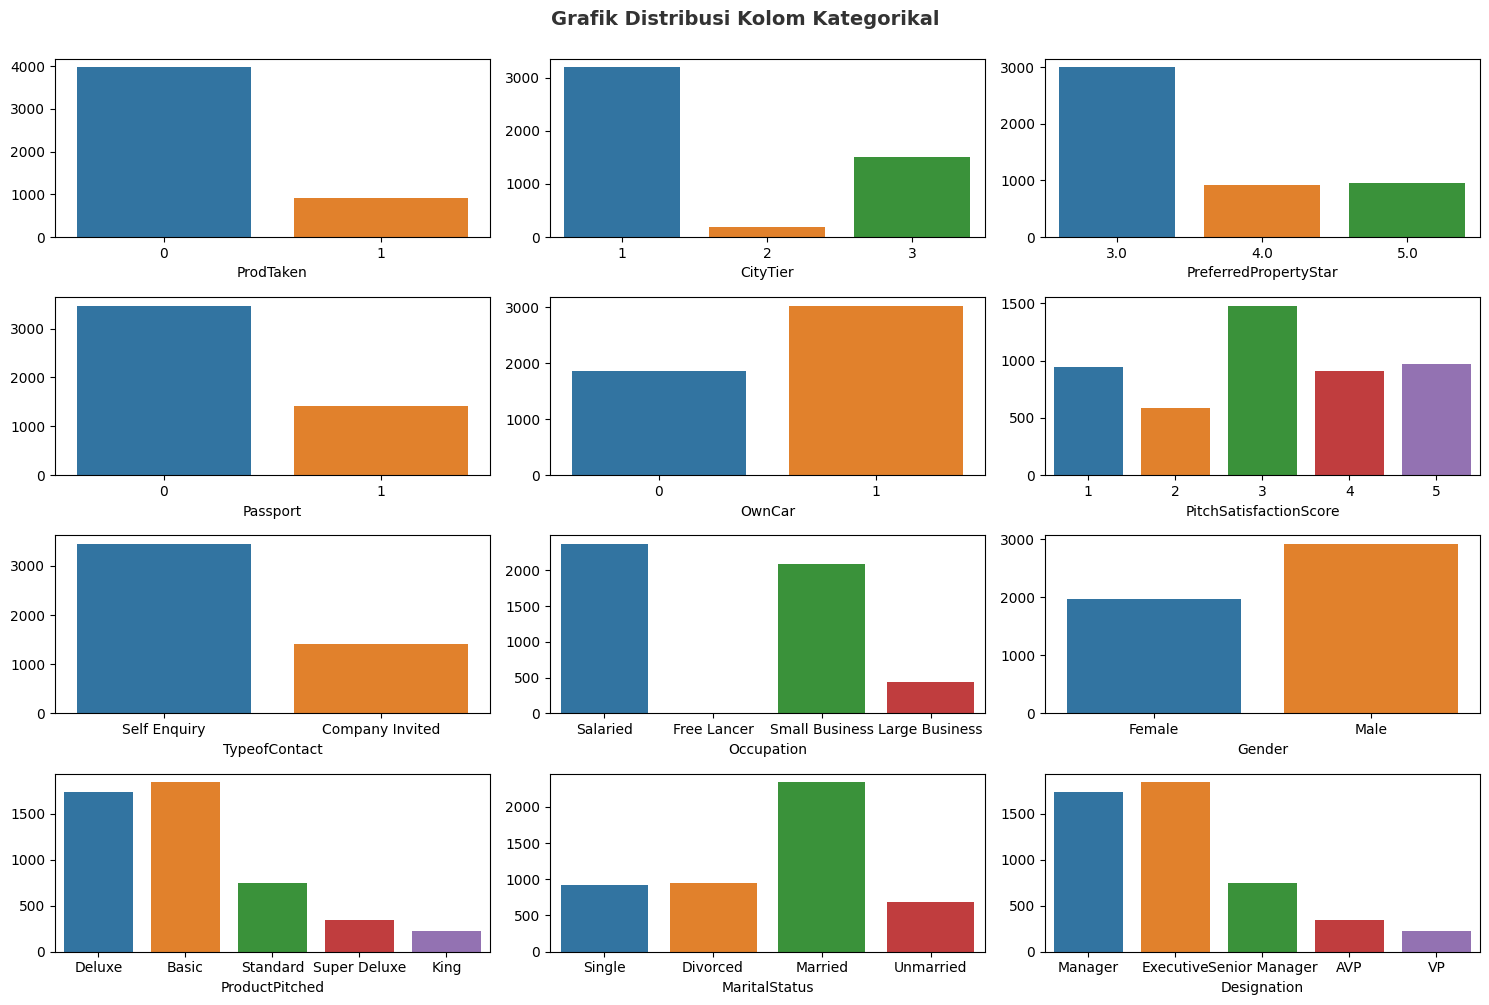

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi Kolom Kategorikal', fontsize=14, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cats):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col])
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

TypeofContact didominasi oleh Self Enquiry

FItur Occupation didominasi Salaried 

Fitur Gender didominasi pelanggan laki-laki 

Fitur ProductPitched didominasi Basic 

Fitur MaritalStatus didominasi Married

Fitur Designation didominasi Executive

Redundant dalam kategori gender female dan fe-male

Redundant kategori Single dan Unmarried dalam fitur MaritalStatus


## 1.3 Multivariate Analysis

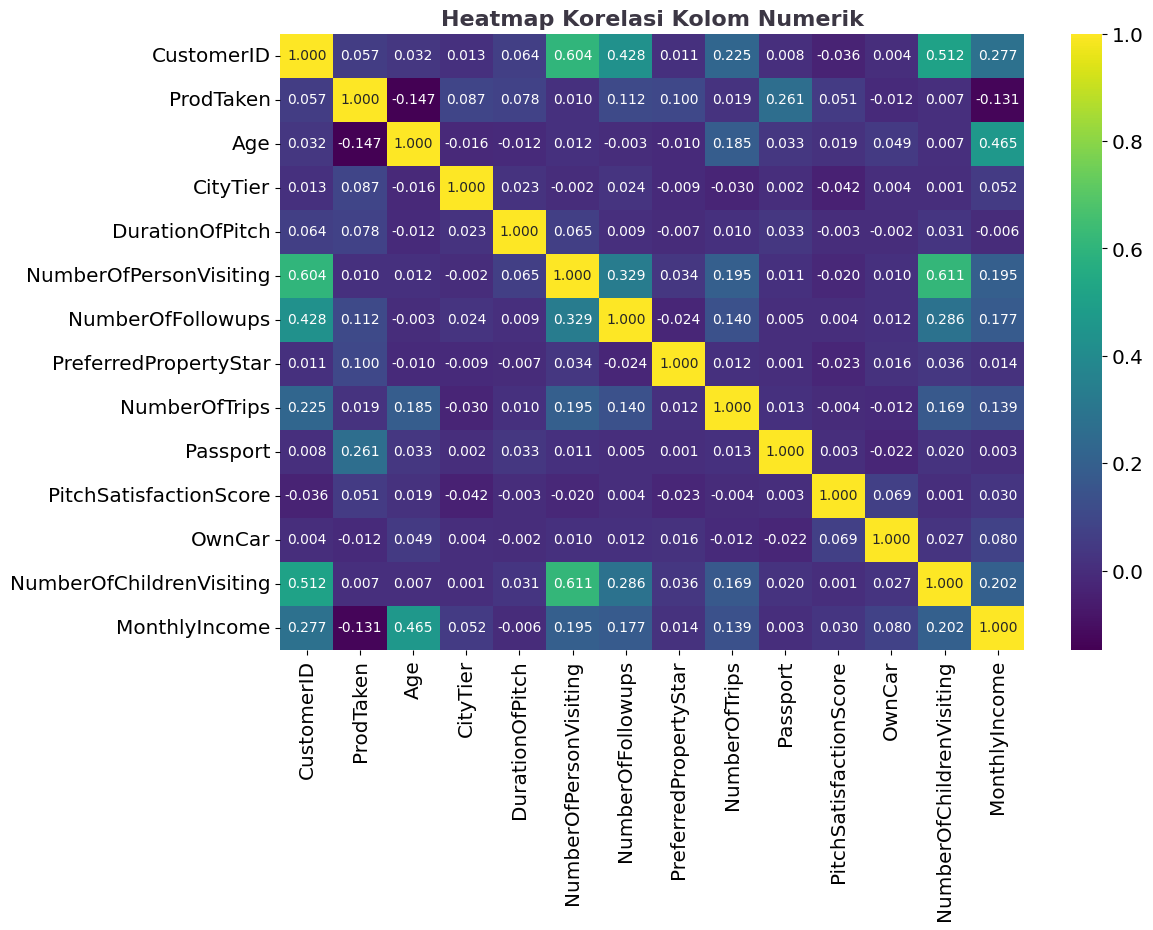

In [ ]:
# Skips CustomerID column
plt.title('Heatmap Korelasi Kolom Numerik', color='#3C3744', fontsize=16, fontweight='bold', y=1)
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

Tidak ada 2 fitur yang berkorelasi kuat (>0.7), maka kemungkinan tidak ada fitur yang redundan. Namun korelasi tertinggi antara fitur NumberofChildrenVisiting dengan fitur NumberOfPersonVisiting sebesar 0.61

Fitur ProdTaken (target) berkorelasi positif dengan fitur kepemilikan passport, number of follow ups dan preferred property star.

Fitur kepemilikan passport memiliki korelasi paling tinggi dengan fitur ProdTaken (target) dengan nilai (0.26), maka fitur tersebut harus dipertahankan. (jumlah pelanggan yang memiliki passpor dan tidak, cukup timpang)

Semakin tinggi jumlah follow-up semakin besar potensi customer untuk membeli paket travel baru. Nilai korelasi ProdTaken terhadap NumberofFollowup 0.11

Customer yang berpotensi membeli paket baru adalah customer yang memilih properti bintang 5, semakin tinggi jumlah bintang, semakin tinggi juga potensi customer untuk membeli paket baru. Nilai korelasi ProdTaken dan PropertyStar 0.10

Fitur ProdTaken (target) berkorelasi negatif dengan Age dan Monthly Income.

Korelasi negatif antara fitur ProdTaken (produk yang dibeli) dengan Age, berarti bahwa semakin muda usia customer maka semakin besar kemungkinan mereka untuk membeli produk tersebut. (-0.15)

Korelasi negatif antara fitur ProdTaken (produk yang dibeli) dengan Monthly Income, berarti bahwa semakin rendah pendapatan bulanannya, semakin besar kemungkinan mereka untuk membeli produk tersebut. (-0.13)

Korelasi tertinggi antara fitur NumberofChildrenVisiting dengan fitur NumberOfPersonVisiting sebesar 0.61



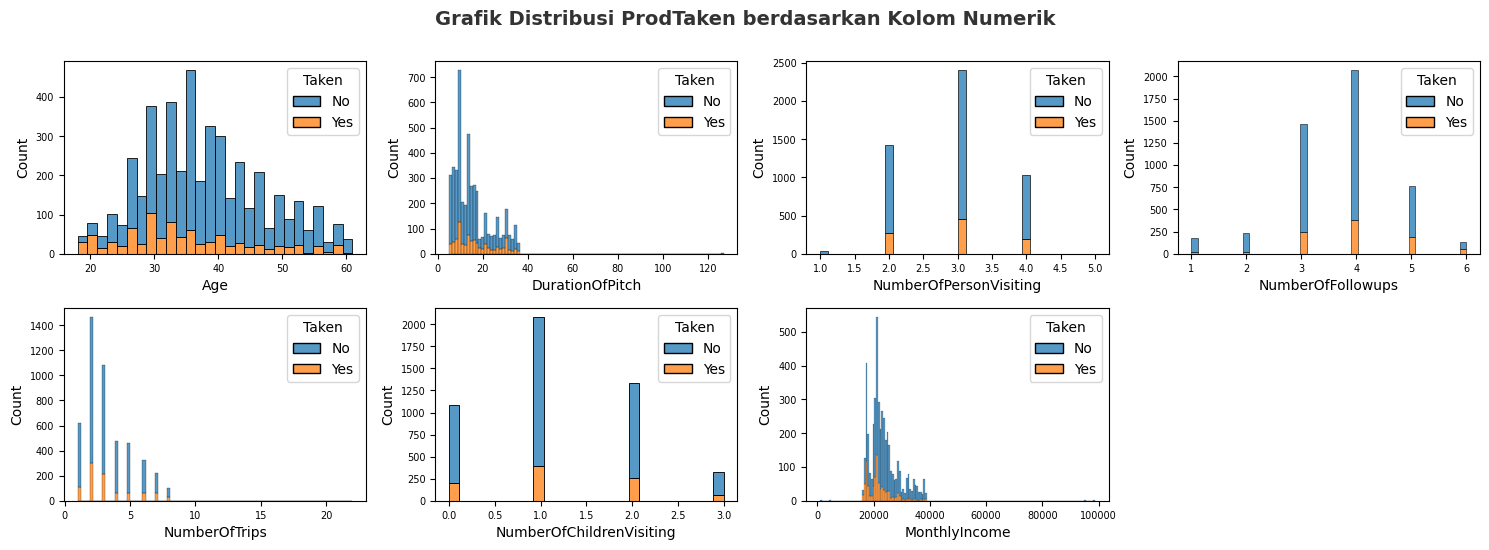

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Numerik', fontsize=14, fontweight='bold', alpha=0.8, y=1.)


for i, col in enumerate(nums[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)        
    sns.histplot(data=df, x=col, hue='ProdTaken', multiple='stack')

    # Custom legend
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')
            
plt.tight_layout()

plt.show()

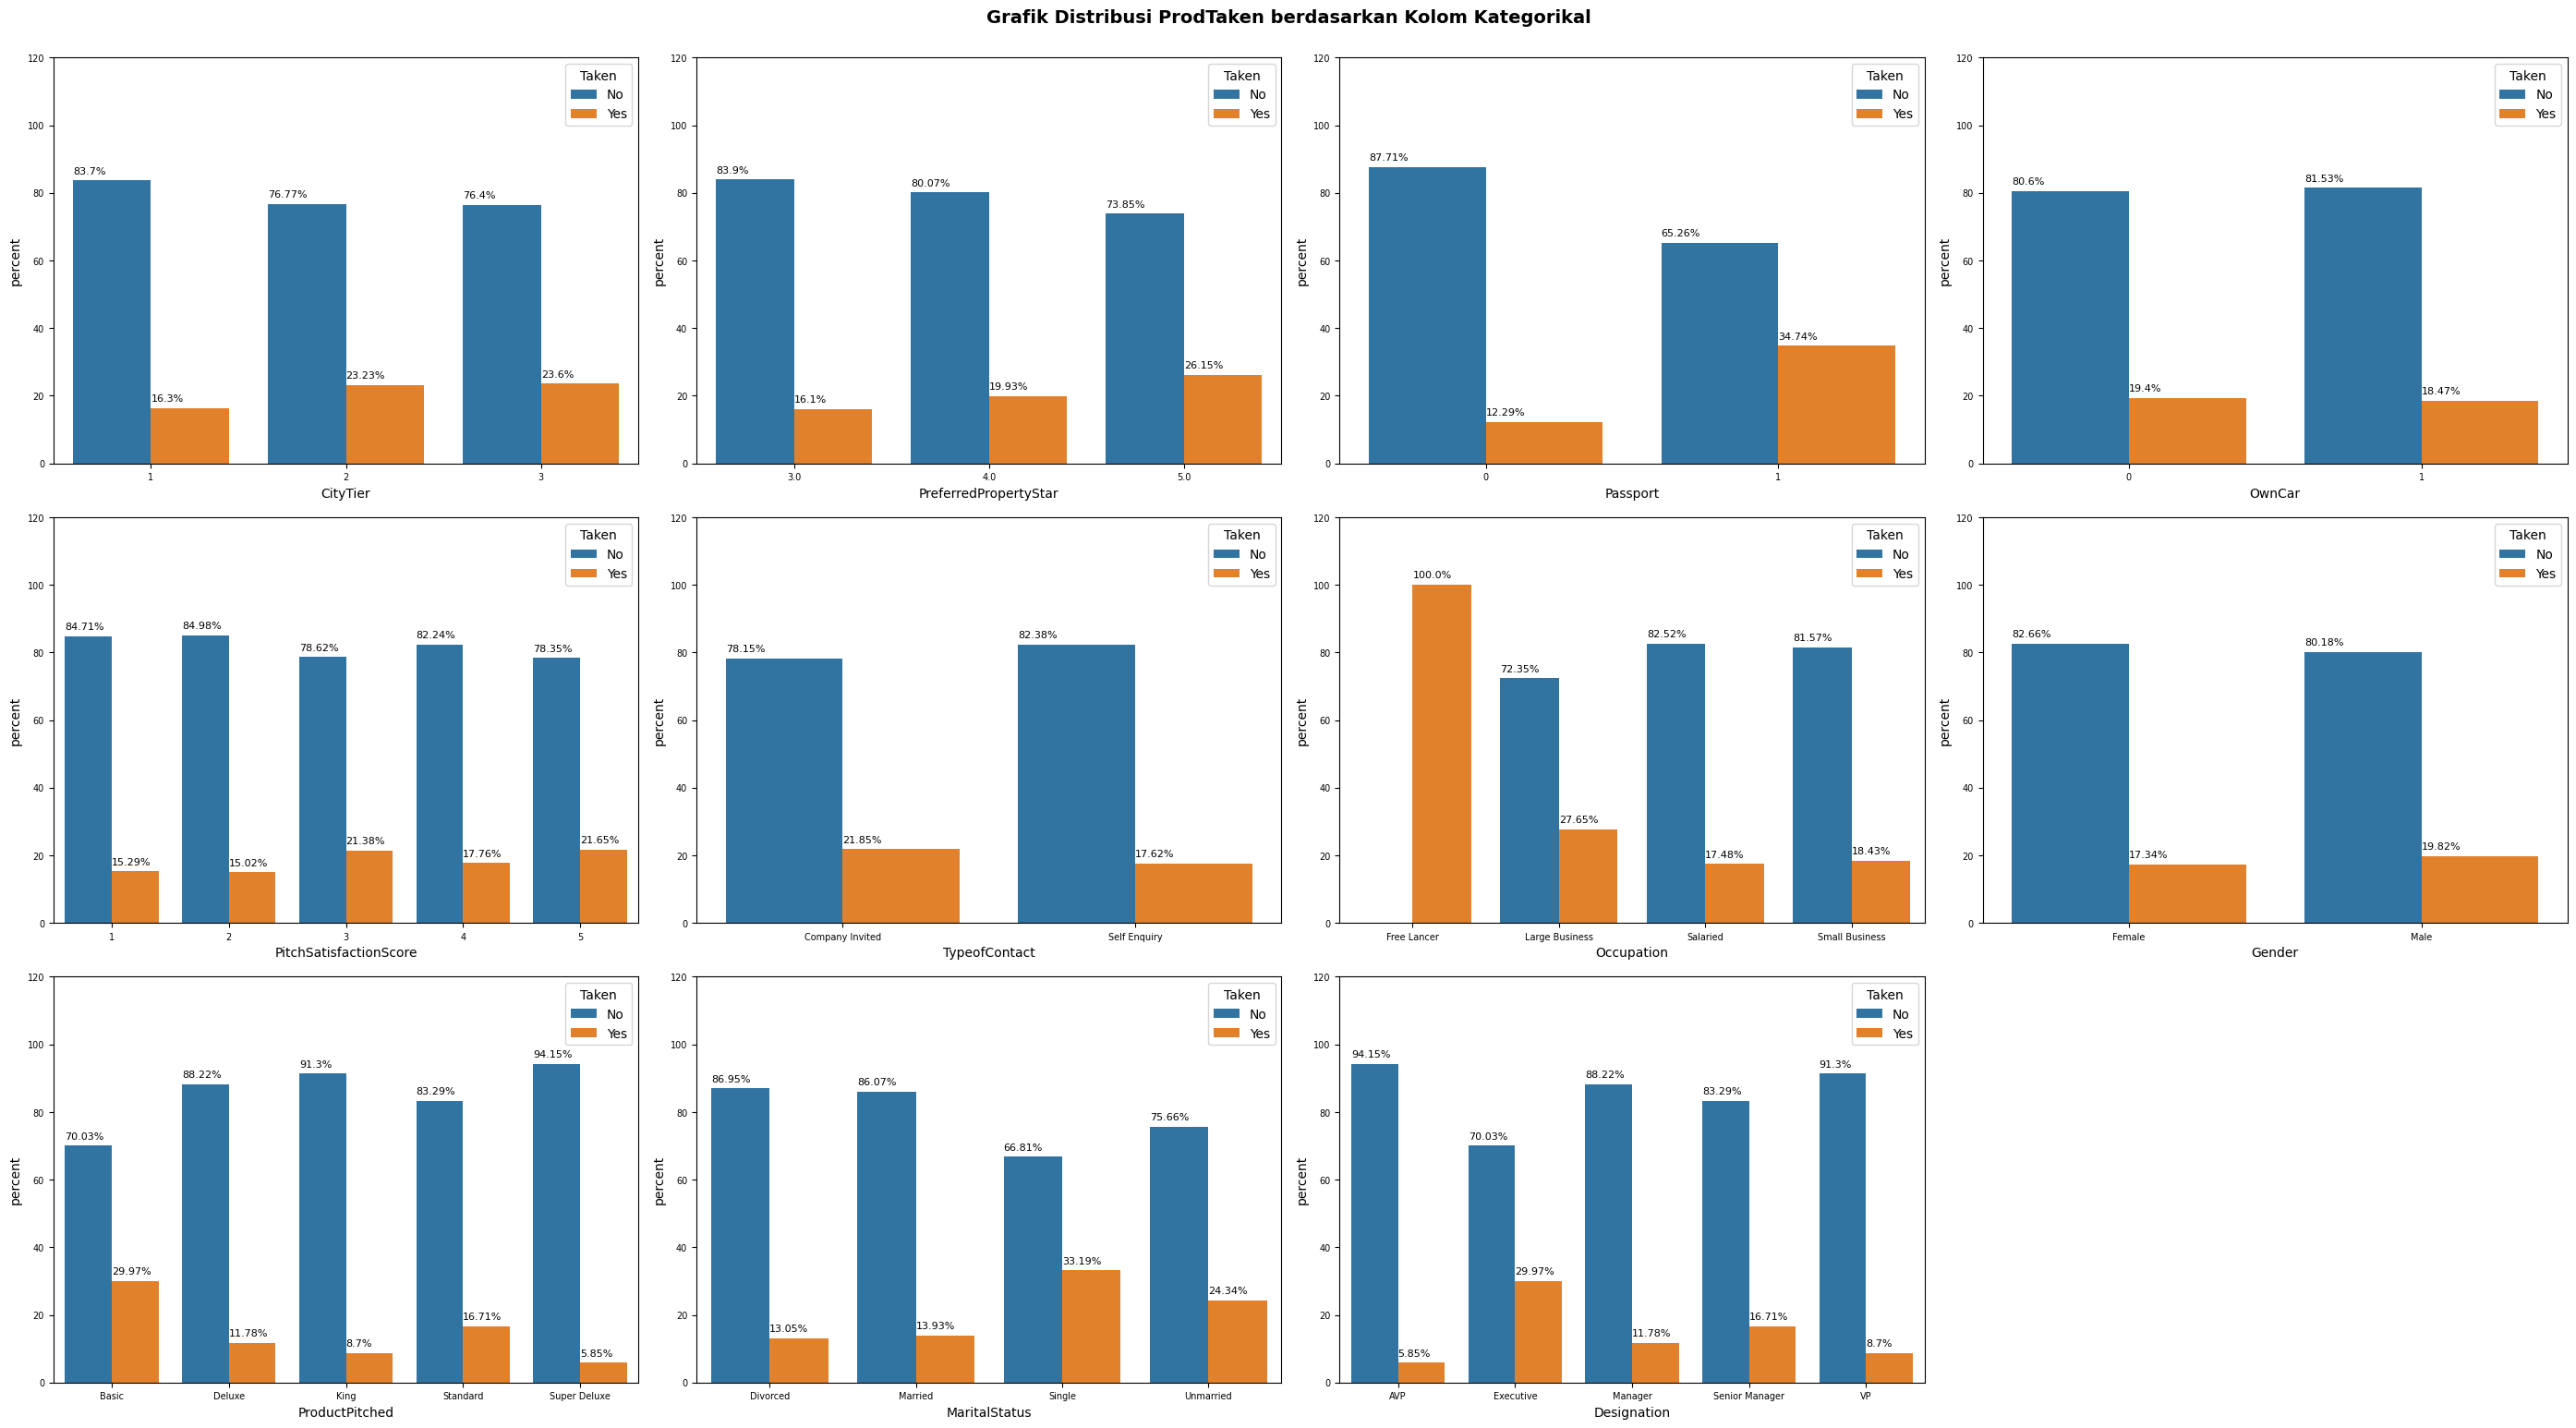

In [ ]:
plt.figure(figsize=(28,20))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Kategorikal', fontsize=14, fontweight='bold', y=1)


for i, col in enumerate(cats[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)        
    plt.ylabel('Percentage')
    df1 = df.groupby(col)['ProdTaken'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    
    g = sns.barplot(x=col, y='percent', hue='ProdTaken', data=df1)
    g.set_ylim(0, 120)    
    g.set_yticks(range(0,121,20))
    g.legend(title='Taken')

    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()

        # Skips error due to Freelancer having 100% ProdTaken rate
        if np.isnan(txt_y):
            continue
        g.text(txt_x, txt_y + 2, txt, ha='left', size=8)

        # Custom legend
        legend = plt.gca().get_legend()
        legend.set_title('Taken')
        legend.get_texts()[0].set_text('No')
        legend.get_texts()[1].set_text('Yes')
        
plt.tight_layout()

plt.show()

Performansi salesman dalam menawarkan product tidak terlalu berpengaruh signifikan terhadap keputusan akhir konsumen untuk membeli product atau tidak, dapat dilihat pada plot bahwa Jumlah customer yang membeli product namun memberikan nilai kepuasan pitching salesman 3 lebih banyak dibandingkan dengan yang memberi nilai kepuasan 5

<Figure size 1500x1500 with 0 Axes>

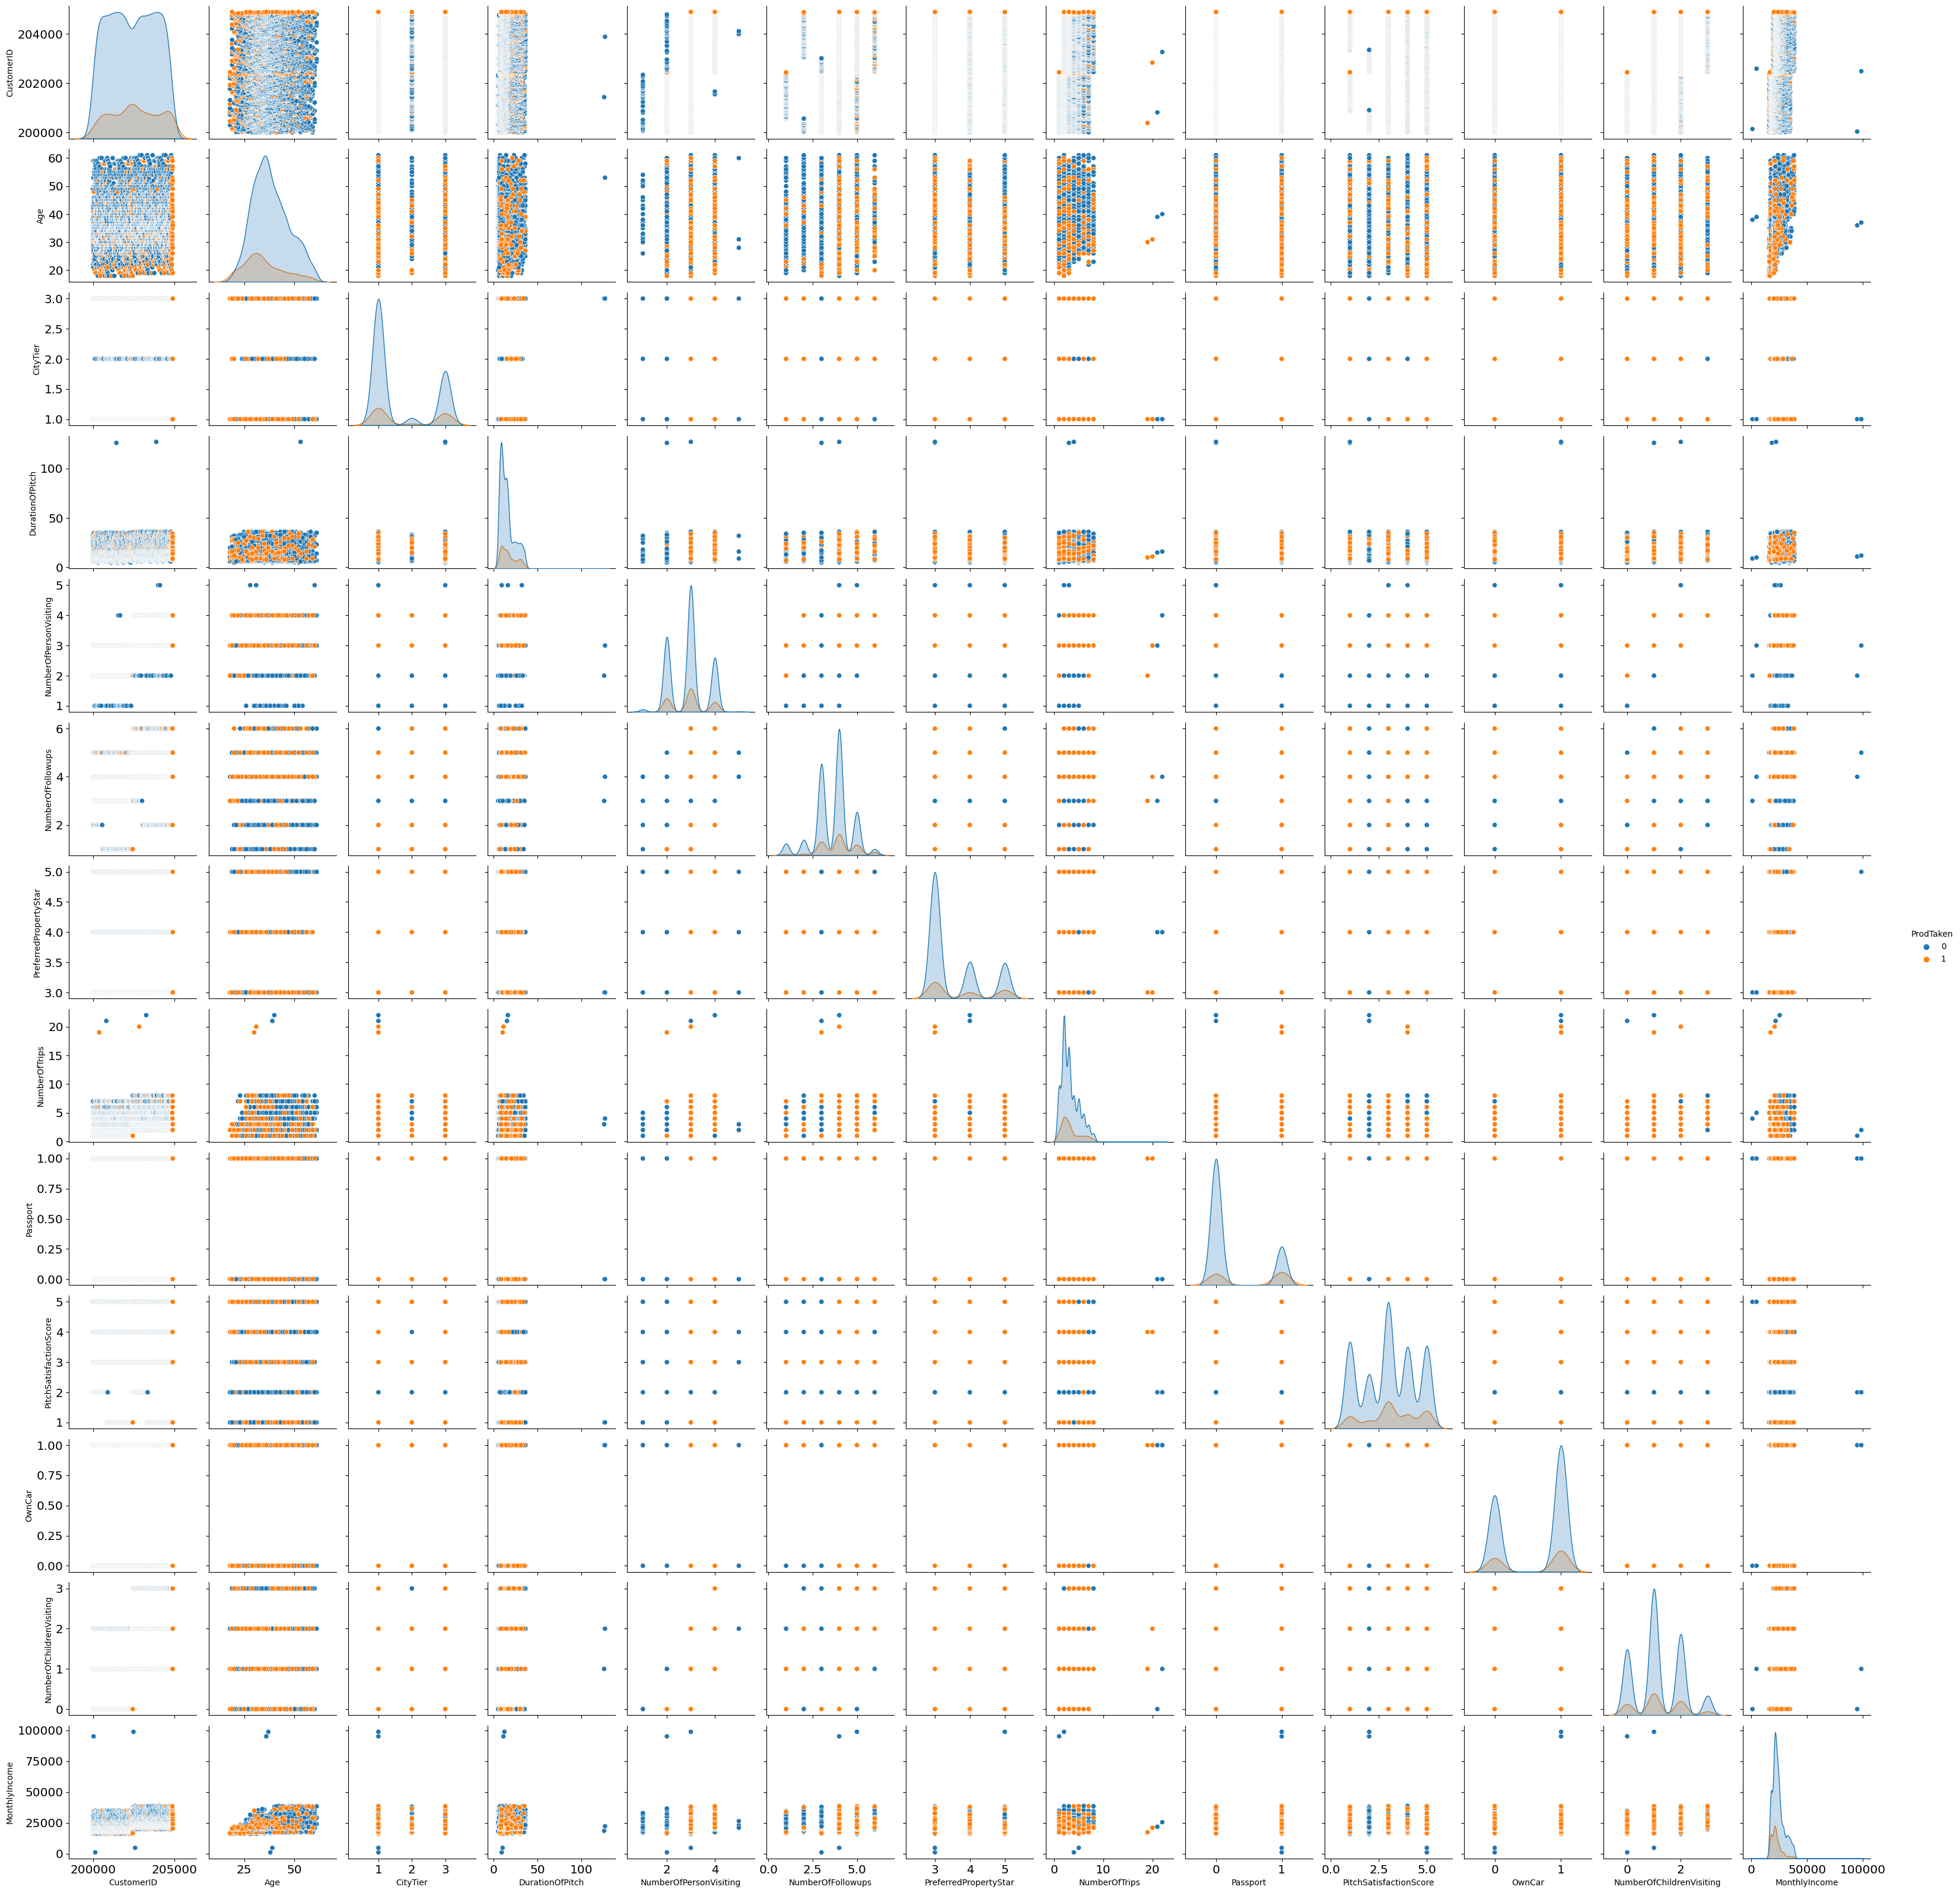

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='ProdTaken')
plt.show()

# 2. Data Pre-Processing

## 2.1 Data Cleansing

Sebelum langkah selanjutnya, kolom CustomerID akan didrop terlebih dahulu karena ...

Kolom Gender yang memiliki 3 nilai, telah diubah menjadi bernilai Male atau Female saja

Selain itu nilai pada kolom Marital Status akan disederhanakan menjadi Single dan Married, dengan Single mencakup Divorced dan Unmarried

Baris customer yang memiliki Occupation 'Free Lancer' akan di drop karena hanya terdapat 2 baris data

In [38]:
df1 = df.copy()

# Conditional to avoid errors on repeated cell runs
if 'CustomerID' in df1.columns:
    df1.drop('CustomerID', axis=1, inplace=True)
if 'CustomerID' in nums:
    nums.remove('CustomerID')
df1.replace(['Divorced', 'Unmarried'], 'Single', inplace=True)
df1.drop(df1[df1.Occupation == 'Free Lancer'].index, inplace=True)

### 2.1.1 Handling Missing Values and Duplicates

In [39]:
fill_modus = ['TypeofContact', 'PreferredPropertyStar', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting']
fill_median = ['DurationOfPitch', 'MonthlyIncome']
fill_mean = ['Age']

for col in fill_modus:
    df1[col].fillna(df[col].mode()[0], inplace=True)

for col in fill_median:
    df1[col].fillna(df[col].mode()[0], inplace=True)

for col in fill_mean:
    df1[col].fillna(df[col].mode()[0], inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4886 non-null   int64  
 1   Age                       4886 non-null   float64
 2   TypeofContact             4886 non-null   object 
 3   CityTier                  4886 non-null   int64  
 4   DurationOfPitch           4886 non-null   float64
 5   Occupation                4886 non-null   object 
 6   Gender                    4886 non-null   object 
 7   NumberOfPersonVisiting    4886 non-null   int64  
 8   NumberOfFollowups         4886 non-null   float64
 9   ProductPitched            4886 non-null   object 
 10  PreferredPropertyStar     4886 non-null   float64
 11  MaritalStatus             4886 non-null   object 
 12  NumberOfTrips             4886 non-null   float64
 13  Passport                  4886 non-null   int64  
 14  PitchSat

pada bagian 1.1 sebelumnya terdapat missing values yang akan ditangani dengan cara ...

In [40]:
dupes = df1.duplicated()
print(f'Total Duplicate Rows: {dupes.sum()}')
dupes_percent = round(df1[dupes].shape[0] / df1.shape[0] * 100, 1)
print(f'Rasio baris data duplikat adalah {dupes_percent}% dari total baris')

Total Duplicate Rows: 141
Rasio baris data duplikat adalah 2.9% dari total baris


In [41]:
df1.drop_duplicates(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4745 non-null   int64  
 1   Age                       4745 non-null   float64
 2   TypeofContact             4745 non-null   object 
 3   CityTier                  4745 non-null   int64  
 4   DurationOfPitch           4745 non-null   float64
 5   Occupation                4745 non-null   object 
 6   Gender                    4745 non-null   object 
 7   NumberOfPersonVisiting    4745 non-null   int64  
 8   NumberOfFollowups         4745 non-null   float64
 9   ProductPitched            4745 non-null   object 
 10  PreferredPropertyStar     4745 non-null   float64
 11  MaritalStatus             4745 non-null   object 
 12  NumberOfTrips             4745 non-null   float64
 13  Passport                  4745 non-null   int64  
 14  PitchSat

### 2.1.2 Handling Outliers

Dalam menangani nilai kolom-kolom yang memiliki outliers sesuai yang disebutkan pada bagian 1.2 sebelumnya, akan diamati perbedaan antara 2 metode yaitu metode IQR dan z-score

In [42]:
df_iqr = pd.DataFrame(index=range(df1.shape[0]))

for col in nums:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_lim = q1 - (1.5 * iqr)
    upper_lim = q3 + (1.5 * iqr)
    iqr_outlier = (df1[col] < lower_lim) | (df1[col] > upper_lim)
    df_iqr[col] = df1[col][iqr_outlier]

df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       0 non-null      float64
 1   DurationOfPitch           106 non-null    float64
 2   NumberOfPersonVisiting    3 non-null      float64
 3   NumberOfFollowups         296 non-null    float64
 4   NumberOfTrips             99 non-null     float64
 5   NumberOfChildrenVisiting  0 non-null      float64
 6   MonthlyIncome             300 non-null    float64
dtypes: float64(7)
memory usage: 259.6 KB


In [43]:
df_zscore = pd.DataFrame(index=range(df1.shape[0]))

for col in nums:
    z_score = np.abs(stats.zscore(df1[col], nan_policy='omit'))
    df_zscore[col] = df1[col][z_score > 3]

df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       0 non-null      float64
 1   DurationOfPitch           2 non-null      float64
 2   NumberOfPersonVisiting    0 non-null      float64
 3   NumberOfFollowups         0 non-null      float64
 4   NumberOfTrips             4 non-null      float64
 5   NumberOfChildrenVisiting  0 non-null      float64
 6   MonthlyIncome             4 non-null      float64
dtypes: float64(7)
memory usage: 259.6 KB


Berdasarkan metode IQR, nilai yang dianggap sebagai outlier jumlahnya cukup signifikan sehingga dikhawatirkan akan membuang terlalu banyak data.

Untuk metode z-score akan coba diamati lagi nilai apa saja yang akan dibuang.

In [44]:
# Untuk melihat nilai apa saja yang dianggap outlier oleh zscore
df_zscore.dropna(how='all').dropna(how='all', axis=1).replace(np.nan, '-')

DurationOfPitch NumberOfTrips MonthlyIncome
38                 -             -       95000.0
142                -             -        1000.0
385                -          19.0             -
816                -          21.0             -
1434           126.0             -             -
2482               -             -       98678.0
2586               -             -        4678.0
2829               -          20.0             -
3260               -          22.0             -
3878           127.0             -             -

Berdasarkan pertimbangan sebelumnya mengenai jumlah data yang akan dianggap sebagai outlier, akan digunakan metode z-score yang cukup untuk mendeteksi nilai yang sangat ekstrim sesuai yang ditunjukkan oleh tabel di atas.


In [45]:
# untuk drop outlier berdasar zscore
df1.drop(df_zscore.dropna(how='all').index, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4735 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4735 non-null   int64  
 1   Age                       4735 non-null   float64
 2   TypeofContact             4735 non-null   object 
 3   CityTier                  4735 non-null   int64  
 4   DurationOfPitch           4735 non-null   float64
 5   Occupation                4735 non-null   object 
 6   Gender                    4735 non-null   object 
 7   NumberOfPersonVisiting    4735 non-null   int64  
 8   NumberOfFollowups         4735 non-null   float64
 9   ProductPitched            4735 non-null   object 
 10  PreferredPropertyStar     4735 non-null   float64
 11  MaritalStatus             4735 non-null   object 
 12  NumberOfTrips             4735 non-null   float64
 13  Passport                  4735 non-null   int64  
 14  PitchSat

### 2.1.3 Feature Transformation

In [46]:
df1['Age_norm'] = MinMaxScaler().fit_transform(df1['Age'].values.reshape(len(df1), 1))
df1['Age_std'] = StandardScaler().fit_transform(df1['Age'].values.reshape(len(df1), 1))
Age1 = ['Age','Age_norm','Age_std']
df1[Age1].describe()

Age  Age_norm   Age_std
count  4735.00   4735.00  4.74e+03
mean     37.47      0.45  2.61e-16
std       9.14      0.21  1.00e+00
min      18.00      0.00 -2.13e+00
25%      31.00      0.30 -7.08e-01
50%      36.00      0.42 -1.61e-01
75%      43.00      0.58  6.06e-01
max      61.00      1.00  2.58e+00

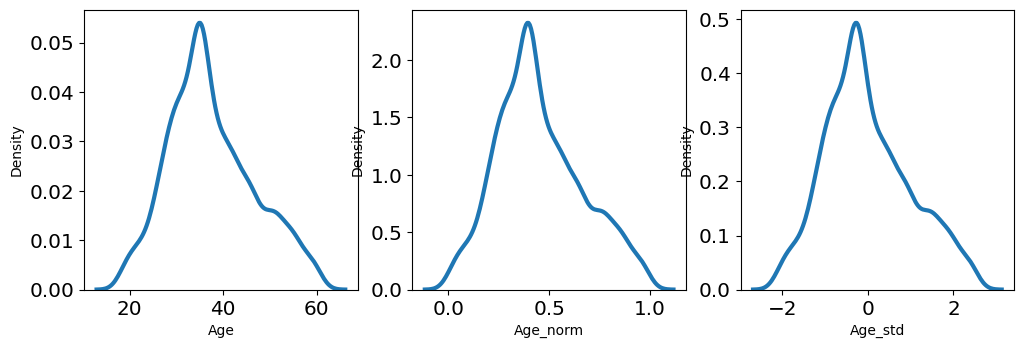

In [47]:
for i in range(len(Age1)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df1[Age1[i]])

In [48]:
skew_col = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

for col in skew_col:
    col_name = 'log ' + col
    df1[col_name] = np.log(df1[col])
log =  ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'log DurationOfPitch', 'log NumberOfTrips', 'log MonthlyIncome']
df1[log].describe()

DurationOfPitch  NumberOfTrips  MonthlyIncome  log DurationOfPitch  \
count          4735.00        4735.00        4735.00              4735.00   
mean             15.14           3.18       23289.16                 2.58   
std               8.13           1.76        5194.44                 0.51   
min               5.00           1.00       16009.00                 1.61   
25%               9.00           2.00       19869.00                 2.20   
50%              13.00           3.00       21932.00                 2.56   
75%              19.00           4.00       25389.00                 2.94   
max              36.00           8.00       38677.00                 3.58   

       log NumberOfTrips  log MonthlyIncome  
count            4735.00            4735.00  
mean                1.01              10.03  
std                 0.56               0.21  
min                 0.00               9.68  
25%                 0.69               9.90  
50%                 1.10              10.00  
75%                 1.39              10.14  
max                 2.08              10.56

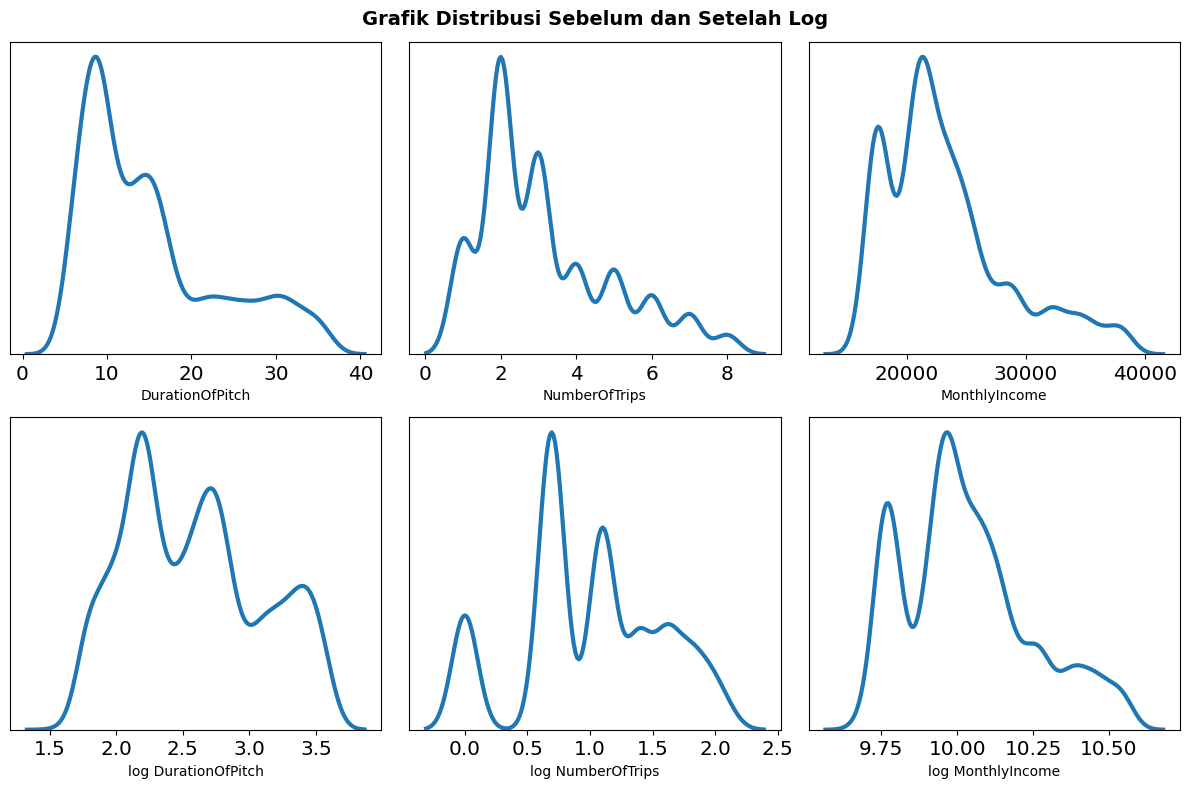

In [49]:
plt.suptitle('Grafik Distribusi Sebelum dan Setelah Log', fontsize=14, fontweight='bold')
for i in range(len(log)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df1[log[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

In [50]:
df1['Dur_norm'] = MinMaxScaler().fit_transform(df1['DurationOfPitch'].values.reshape(len(df1), 1))
df1['Dur_std'] = StandardScaler().fit_transform(df1['DurationOfPitch'].values.reshape(len(df1), 1))
Dur = ['DurationOfPitch','Dur_norm','Dur_std']
df1[Dur].describe()

DurationOfPitch  Dur_norm   Dur_std
count          4735.00   4735.00  4.74e+03
mean             15.14      0.33 -5.40e-17
std               8.13      0.26  1.00e+00
min               5.00      0.00 -1.25e+00
25%               9.00      0.13 -7.55e-01
50%              13.00      0.26 -2.63e-01
75%              19.00      0.45  4.76e-01
max              36.00      1.00  2.57e+00

In [51]:
df1['incm_norm'] = MinMaxScaler().fit_transform(df1['MonthlyIncome'].values.reshape(len(df1), 1))
df1['incm_std'] = StandardScaler().fit_transform(df1['MonthlyIncome'].values.reshape(len(df1), 1))
Income = ['MonthlyIncome','incm_norm','incm_std']
df1[Income].describe()

MonthlyIncome  incm_norm  incm_std
count        4735.00    4735.00  4.74e+03
mean        23289.16       0.32  3.36e-16
std          5194.44       0.23  1.00e+00
min         16009.00       0.00 -1.40e+00
25%         19869.00       0.17 -6.58e-01
50%         21932.00       0.26 -2.61e-01
75%         25389.00       0.41  4.04e-01
max         38677.00       1.00  2.96e+00

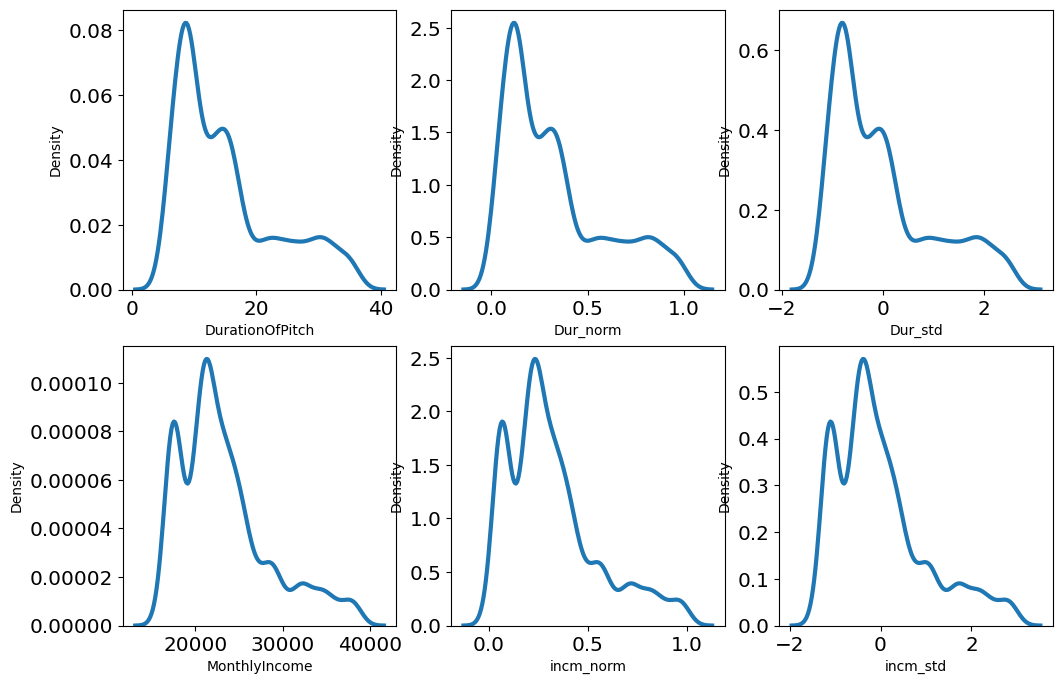

In [52]:
for i in range(len(Dur)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df1[Dur[i]])

for i in range(len(Income)):
    plt.subplot(2,3,i+4)
    sns.kdeplot(df1[Income[i]])

### 2.1.4 Feature Encoding

#### Label encoding untuk typeofcontact dan gender: karena masih berbentuk data kategorikal perlu diubah menjadi numerik untuk selanjutnya membuat model

In [53]:
# df sementara untuk testing sebelum revisi
df1_before = df1.copy()

In [54]:
le = LabelEncoder()
binary_encode = ['TypeofContact', 'Gender', 'MaritalStatus']

for col in binary_encode:
    df1[col] = le.fit_transform(df1[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'Hasil encode pada kolom {col}: {mapping}')

Hasil encode pada kolom TypeofContact: {'Company Invited': 0, 'Self Enquiry': 1}
Hasil encode pada kolom Gender: {'Female': 0, 'Male': 1}
Hasil encode pada kolom MaritalStatus: {'Married': 0, 'Single': 1}


In [55]:
map_encode = {'ProductPitched' : {'Basic': 0, 'Standard': 1, 'Deluxe': 2, 'Super Deluxe': 3, 'King': 4},
              'Designation' : {'Manager': 0, 'Senior Manager': 1, 'AVP': 2, 'VP': 3, 'Executive': 4}}

for col, mapping in map_encode.items():
    df1[col] = df1[col].map(mapping)

In [56]:
df_encoded_Occupation = pd.get_dummies(df1, columns=['Occupation'])
df_encoded_Occupation.head(5)

ProdTaken   Age  TypeofContact  CityTier  DurationOfPitch  Gender  \
0          1  41.0              1         3              6.0       0   
1          0  49.0              0         1             14.0       1   
3          0  33.0              0         1              9.0       0   
4          0  35.0              1         1              8.0       1   
5          0  32.0              0         1              8.0       1   

   NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                       3                3.0               2   
1                       3                4.0               2   
3                       2                3.0               0   
4                       2                3.0               0   
5                       3                3.0               0   

   PreferredPropertyStar  MaritalStatus  NumberOfTrips  Passport  \
0                    3.0              1            1.0         1   
1                    4.0              1            2.0         0   
3                    3.0              1            2.0         1   
4                    4.0              1            1.0         0   
5                    3.0              1            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  Designation  \
0                       2       1                       0.0            0   
1                       3       1                       2.0            0   
3                       5       1                       1.0            4   
4                       5       1                       0.0            4   
5                       5       1                       1.0            4   

   MonthlyIncome  Age_norm  Age_std  log DurationOfPitch  log NumberOfTrips  \
0        20993.0      0.53     0.39                 1.79               0.00   
1        20130.0      0.72     1.26                 2.64               0.69   
3        17909.0      0.35    -0.49                 2.20               0.69   
4        18468.0      0.40    -0.27                 2.08               0.00   
5        18068.0      0.33    -0.60                 2.08               0.00   

   log MonthlyIncome  Dur_norm  Dur_std  incm_norm  incm_std  \
0               9.95      0.03    -1.12       0.22     -0.44   
1               9.91      0.29    -0.14       0.18     -0.61   
3               9.79      0.13    -0.75       0.08     -1.04   
4               9.82      0.10    -0.88       0.11     -0.93   
5               9.80      0.10    -0.88       0.09     -1.01   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  
0                          0                    1                          0  
1                          0                    1                          0  
3                          0                    1                          0  
4                          0                    0                          1  
5                          0                    1                          0

Apabila designation di lakukan OHE

In [61]:
df_ohe_designation = pd.get_dummies(df1_before['Designation'], prefix='level')
data_encoded = pd.concat([df1[['ProdTaken','TypeofContact','Gender', 'MonthlyIncome']], pd.get_dummies(df_ohe_designation, prefix='level')], axis=1)
data_encoded.head()

ProdTaken  TypeofContact  Gender  MonthlyIncome  level_AVP  \
0          1              1       0        20993.0          0   
1          0              0       1        20130.0          0   
3          0              0       0        17909.0          0   
4          0              1       1        18468.0          0   
5          0              0       1        18068.0          0   

   level_Executive  level_Manager  level_Senior Manager  level_VP  
0                0              1                     0         0  
1                0              1                     0         0  
3                1              0                     0         0  
4                1              0                     0         0  
5                1              0                     0         0

### 2.1.5 Handling Class Imbalance

In [70]:
# df sementara untuk keperluan testing cell di bawah
# df1: occupation belum di OHE
# df_encoded_Occupation: df dengan occupation OHE, sisanya label encoded
# data_encoded: df pilihan kak naomi
df_used = df_encoded_Occupation

In [71]:
# solusi sementara karena jumlah kolom setelah transformasi terlalu banyak
default_col = ['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']

In [72]:
# pemisahan features vs target
X = df_used.drop(['ProdTaken'], axis = 1)
y = df_used['ProdTaken']

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4735 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4735 non-null   float64
 1   TypeofContact              4735 non-null   int64  
 2   CityTier                   4735 non-null   int64  
 3   DurationOfPitch            4735 non-null   float64
 4   Gender                     4735 non-null   int64  
 5   NumberOfPersonVisiting     4735 non-null   int64  
 6   NumberOfFollowups          4735 non-null   float64
 7   ProductPitched             4735 non-null   int64  
 8   PreferredPropertyStar      4735 non-null   float64
 9   MaritalStatus              4735 non-null   int64  
 10  NumberOfTrips              4735 non-null   float64
 11  Passport                   4735 non-null   int64  
 12  PitchSatisfactionScore     4735 non-null   int64  
 13  OwnCar                     4735 non-null   int64

### Handling Class Imbalance menggunakan Oversampling

In [74]:
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

In [75]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')

print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')

Original
0    3845
1     890
Name: ProdTaken, dtype: int64


OVERSAMPLING
1    3845
0    3845
Name: ProdTaken, dtype: int64




### Handling Class Imbalance menggunakan SMOTE

In [76]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape, y_smote.shape)

print('SMOTE')
print(pd.Series(y_smote).value_counts())
print('\n')

(7690, 29) (7690,)
SMOTE
1    3845
0    3845
Name: ProdTaken, dtype: int64




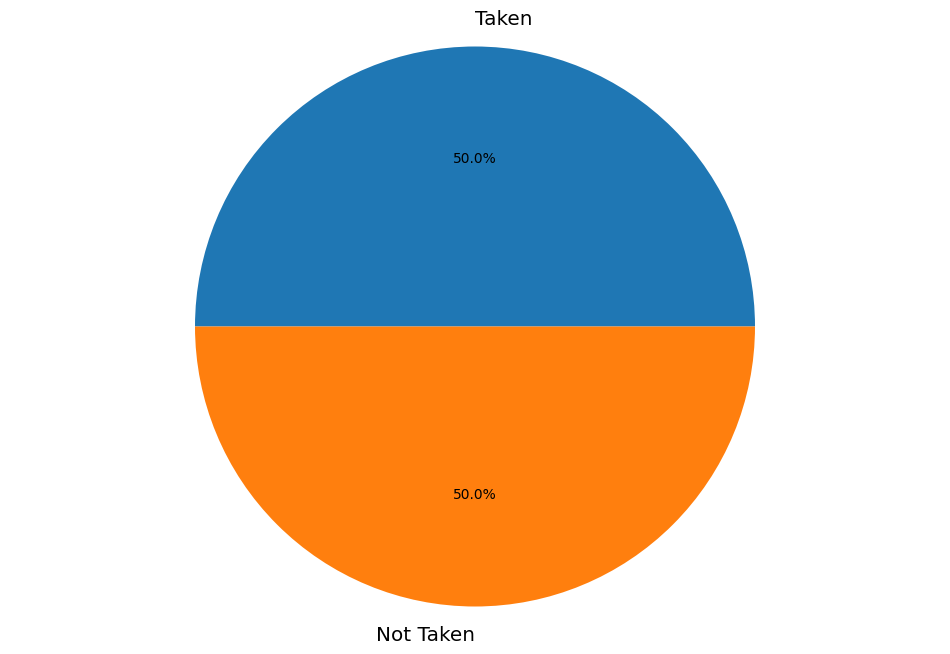

In [77]:
plt.pie(y_smote.value_counts(), labels=['Taken', 'Not Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.savefig('SMOTE')
plt.show()

## 2.2 Feature Engineering

### 2.2.1 Feature Selection

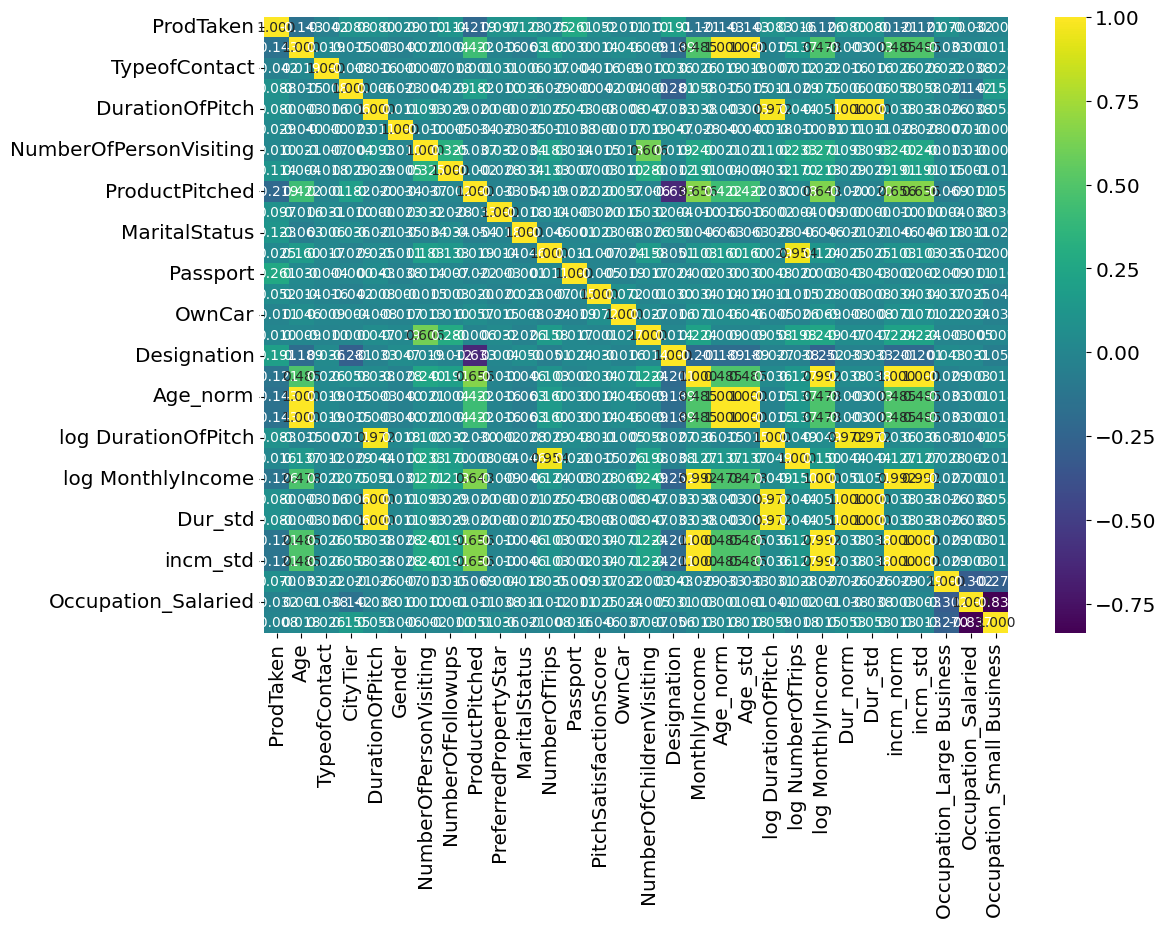

In [80]:
sns.heatmap(df_used.corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

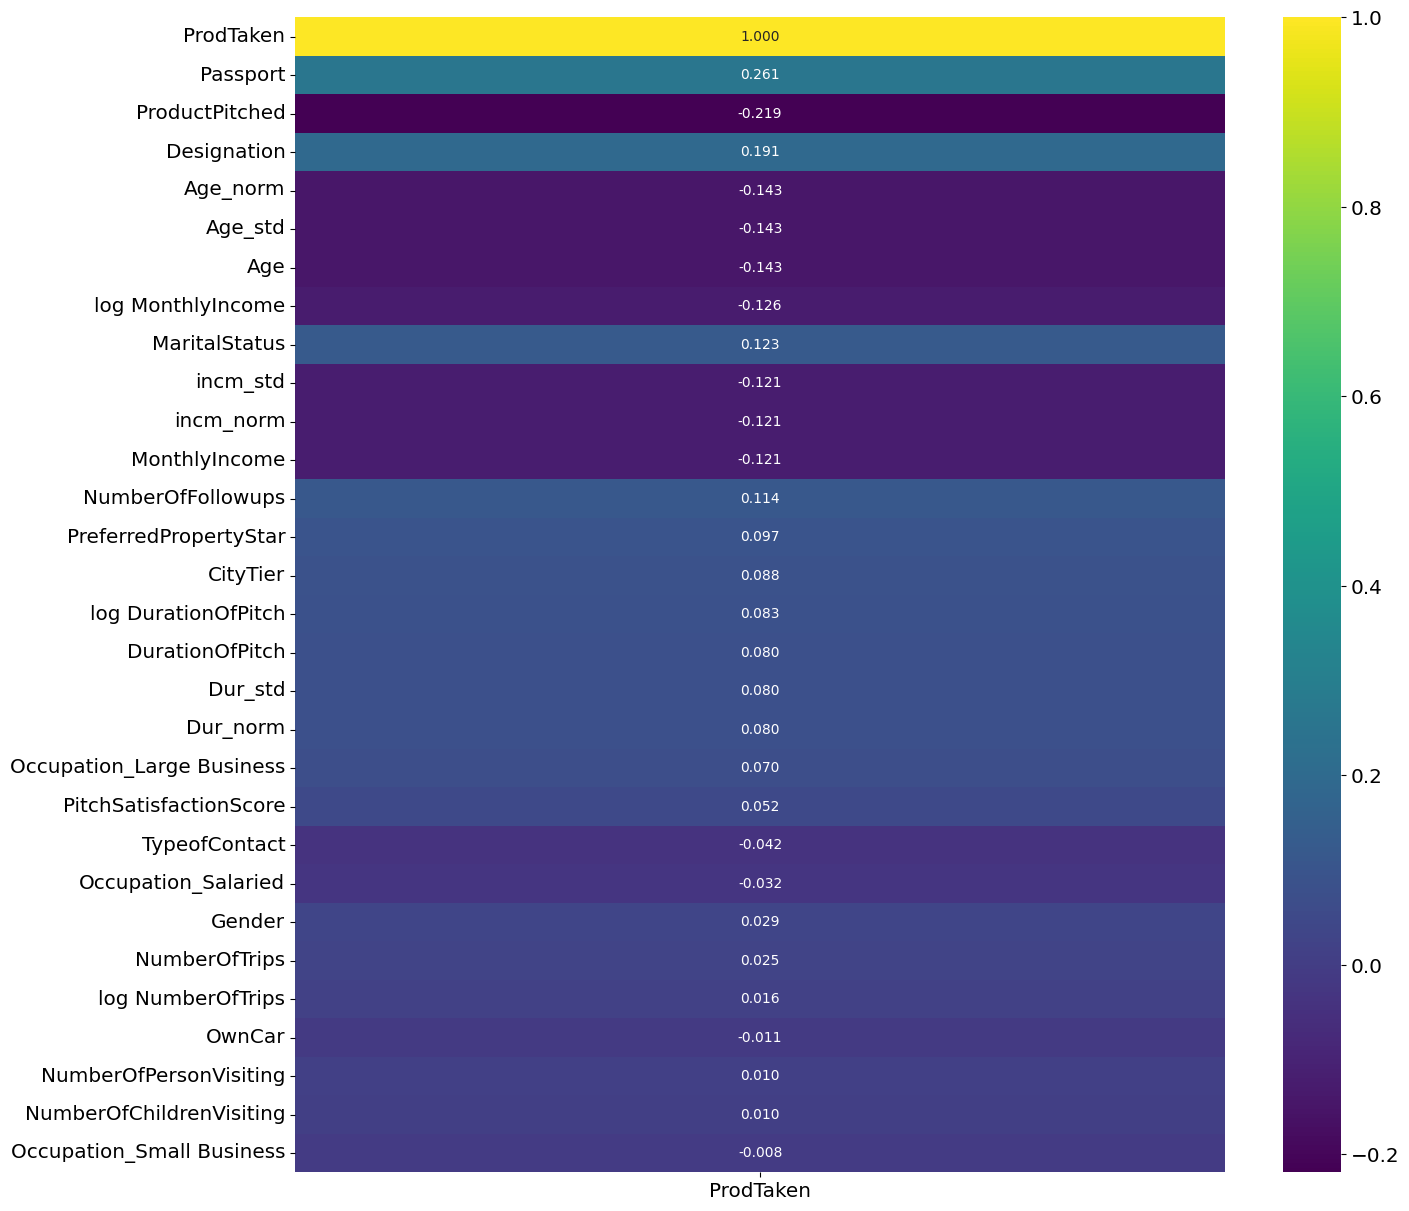

In [88]:
target_corr = df_used.corr()[['ProdTaken']]
target_corr['abs'] = np.abs(target_corr['ProdTaken'])
target_corr = target_corr.sort_values(by='abs', ascending=False).drop('abs', axis=1)

plt.figure(figsize=(15,15))
sns.heatmap(target_corr, cmap='viridis', annot=True, fmt='.3f')
plt.show()

- Fitur-fitur yang akan dipertahankan:
Typeofcontact, citytier, durationofpitch, occupation, Designation, Age, numberoffollowups, productpitched, preferredpropertystar, maritalstatus,  MonthlyIncome, Gender, Passport , pitchsatisfactionscore (dipertimbangkan dari lihat heatmap dan grafik persentase)
- Fitur yang akan dibuang: 
Number of Person visiting dan children visiting, own car dan number of trips (Alasan: korelasi sangat kecil dilihat pada heatmap setelah handling data)

FollUp:
- Apakah fitur person visiting dan children visiting perlu dipertahankan? Atau didrop?
- Apa yang dipertimbangkan sebuah fitur relate dgn target atau tidak?



### 2.2.2 Feature Extraction

Diskusi dan follup:
Number of visiting dan children visiting didrop tapi dijadiin fitur baru sendiri atau tidak (atau bawa keluarga).
